In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt

# <center> Домашнее задание №2 </center>
#### Выполнил: Мартиросян Арутюн Артушович, группа ВВО-19

## <center> Моделирование движения системы двух тел $ m_{1} $ и $ m_{2} $, взамодействующих между собой под действием силы тяготения </center>

Уравнения движения системы двух тел с массами $ m_{1} $ и $ m_{2} $, взаимодействующих  между собой под действием силы тяготения:

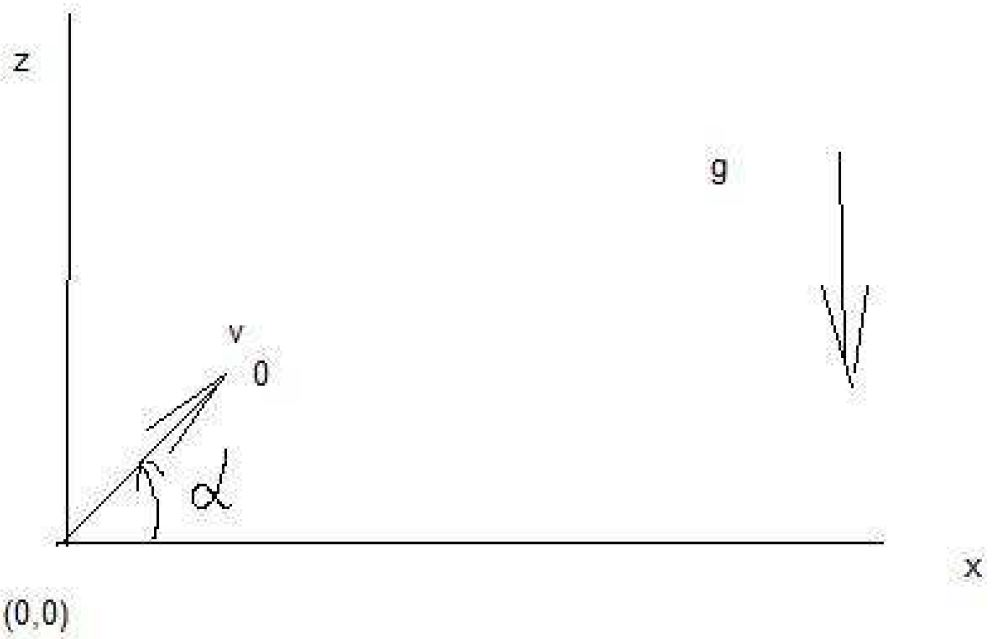

In [2]:
from IPython.display import Image
Image(filename='task_image.JPG', width=400, height=400)

### 1) Написать функцию вычисления аналитического решения системы уравнения движения частицы. Нарисовать графики аналитических траекторий Z(x) и X(t), Z(t), Vx(t), Vz(t)

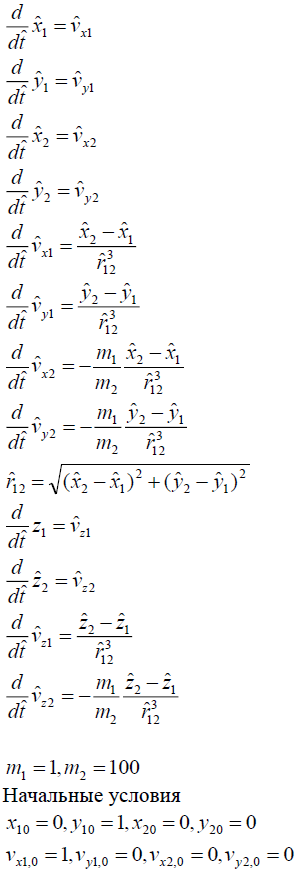

In [7]:
from IPython.display import Image
Image(filename='task2_equations(pic1).PNG', width=300, height=100)

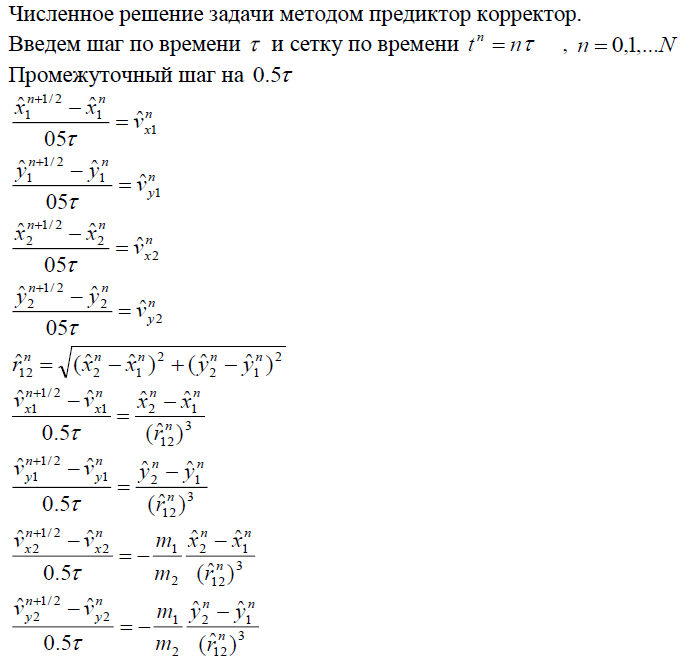

In [12]:
Image(filename='task2_num_solution(pic2).PNG', width=600, height=200)

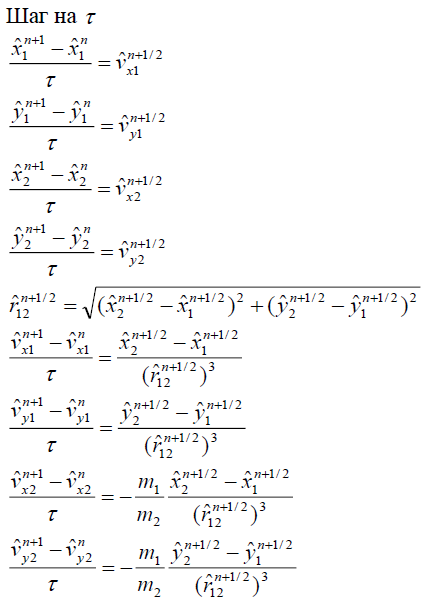

In [15]:
Image(filename='task2_num_solution(pic3).PNG', width=400, height=200)

In [35]:
# Функция численного решения задачи
def PredictorCorrector_method (m_1, m_2, init_coord, init_velocity, tau, T):
    n = int(round(T/tau))
    t = np.linspace(0, n * tau, n + 1)
    
    x_1 = np.zeros(n + 1)
    y_1 = np.zeros(n + 1)
    x_2 = np.zeros(n + 1)
    y_2 = np.zeros(n + 1)
    
    Vx_1 = np.zeros(n + 1)
    Vy_1 = np.zeros(n + 1)
    Vx_2 = np.zeros(n + 1)
    Vy_2 = np.zeros(n + 1)
    
    x_1[0] = init_coord[0]
    y_1[0] = init_coord[1]
    x_2[0] = init_coord[2]
    y_2[0] = init_coord[3]
    
    Vx_1[0] = init_velocity[0]
    Vy_1[0] = init_velocity[1]
    Vx_2[0] = init_velocity[2]
    Vy_2[0] = init_velocity[3]
    
    for i in range(n):
        predx_1 = 0.5 * tau * Vx_1[i] + x_1[i]
        predy_1 = 0.5 * tau * Vy_1[i] + y_1[i]
        predx_2 = 0.5 * tau * Vx_2[i] + x_2[i]
        predy_2 = 0.5 * tau * Vy_2[i] + y_2[i]
        
        r_12 = math.sqrt((x_2[i] - x_1[i]) ** 2 + (y_2[i] - y_1[i]) ** 2)
        predr_12 = math.sqrt((predx_2 - predx_1) ** 2 + (predy_2 - predy_1) ** 2)
        
        predVx_1 = 0.5 * tau * (x_2[i] - x_1[i]) / (r_12) ** 3 + Vx_1[i]
        predVy_1 = 0.5 * tau * (y_2[i] - y_1[i]) / (r_12) ** 3 + Vy_1[i]
        predVx_2 = -0.5 * tau * m_1 / m_2 * (x_2[i] - x_1[i]) / (r_12) ** 3 + Vx_2[i]
        predVy_2 = -0.5 * tau * m_1 / m_2 * (y_2[i] - y_1[i]) / (r_12) ** 3 + Vy_2[i]
        
        x_1[i + 1] = tau * predVx_1 + x_1[i]
        y_1[i + 1] = tau * predVy_1 + y_1[i]
        x_2[i + 1] = tau * predVx_2 + x_2[i]
        y_2[i + 1] = tau * predVy_2 + y_2[i]
        
        Vx_1[i + 1] = tau * (predx_2 - predx_1) / (predr_12) ** 3 + Vx_1[i]
        Vy_1[i + 1] = tau * (predy_2 - predy_1) / (predr_12) ** 3 + Vy_1[i]
        Vx_2[i + 1] = -tau * m_1 / m_2 * (predx_2 - predx_1) / (predr_12) ** 3 + Vx_2[i]
        Vy_2[i + 1] = -tau * m_1 / m_2 * (predy_2 - predy_1) / (predr_12) ** 3 + Vy_2[i]
    
    return (t, x_1, y_1, x_2, y_2, Vx_1, Vy_1, Vx_2, Vy_2)

In [36]:
# Начальные условия
init_coord = [0, 1, 0, 0]  # x_10, y_10, x_20, y_20
init_velocity = [1, 0, 0, 0]  # Vx_10, Vy_10, Vx_20, Vy_20

###  $m_{1} = 1 $ , $ m_{2} = 1 $ , шаг  $ \tau = 0.01 $ , время T = [0 ... 20]

In [41]:
m_1 = 1
m_2 = 1
tau = 0.01
T = 20

(t_1, x1_1, y1_1, x2_1, y2_1, Vx1_1, Vy1_1, Vx2_1, Vy2_1) = PredictorCorrector_method(m_1, m_2, init_coord, init_velocity, tau, T)

In [46]:
min(x1_1), max(x1_1)

(0.0, 10.231118445303872)

In [62]:
min(y1_1), max(y1_1)

(0.3328376918717925, 1.0017256324271693)

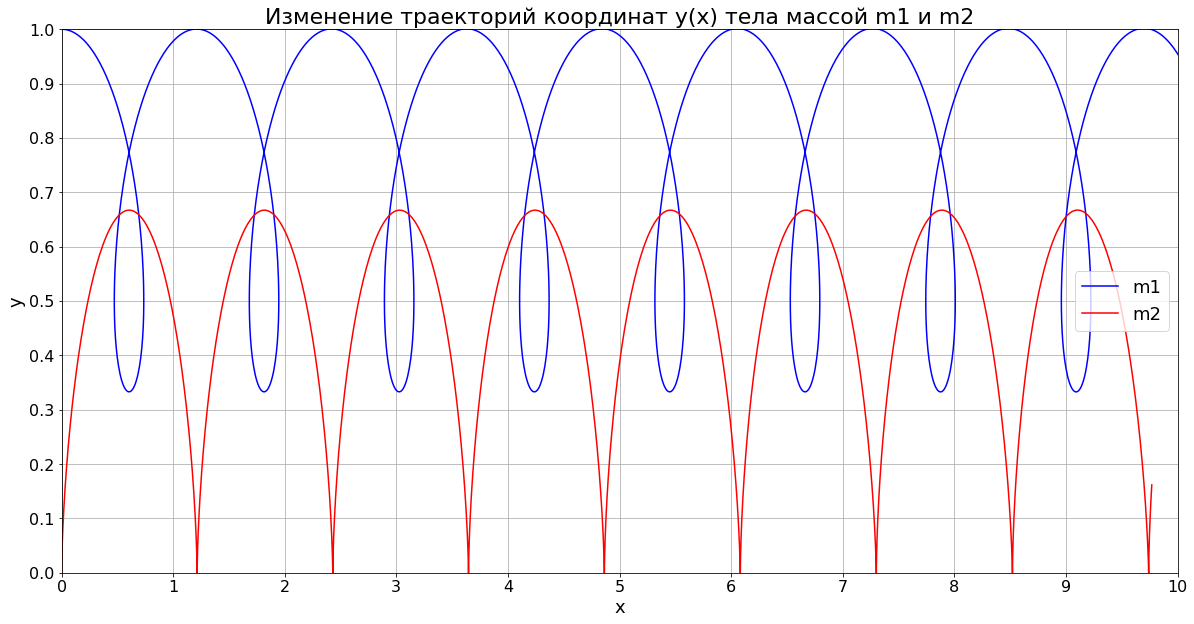

In [50]:
# Графики траекторий координат (x(t), z(t)) без трения
xlim_min = 0.0
xlim_max = 10.0
ylim_min = 0.0
ylim_max = 1.0
#t = range(points)
#t = [t[i]/(points-1) for i in range(len(t))]
#print(t)
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат y(x) тела массой m1 и m2', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(x1_1, y1_1, c = 'blue')
plt.plot(x2_1, y2_1, c = 'red')
plt.legend(['m1', 'm2'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

###  $m_{1} = 1 $ , $ m_{2} = 10 $ , шаг  $ \tau = 0.01 $ , время T = [0 ... 20]

In [73]:
m_1 = 1
m_2 = 10
tau = 0.01
T = 20

(t_2, x1_2, y1_2, x2_2, y2_2, Vx1_2, Vy1_2, Vx2_2, Vy2_2) = PredictorCorrector_method(m_1, m_2, init_coord, init_velocity, tau, T)

In [74]:
min(x1_2), max(x1_2)

(-0.48184331206739894, 2.3936737934746373)

In [75]:
min(y1_2), max(y1_2)

(-0.6667709931839293, 1.0000009534828536)

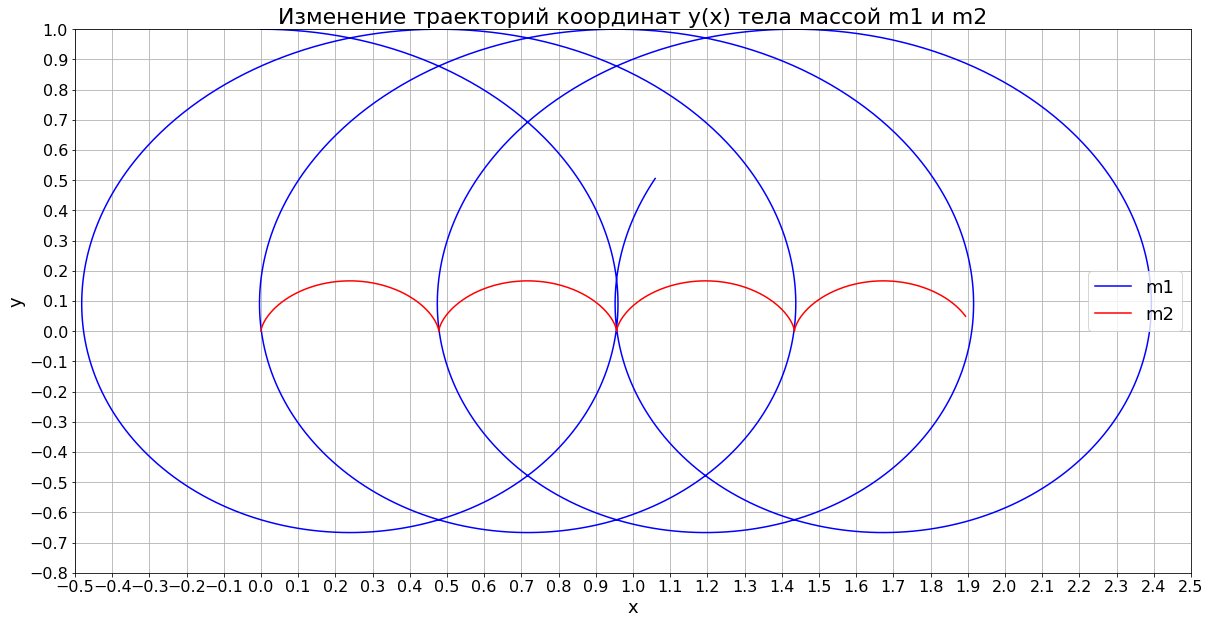

In [76]:
# Графики траекторий координат (x(t), z(t)) без трения
xlim_min = -0.5
xlim_max = 2.5
ylim_min = -0.80
ylim_max = 1.0
#t = range(points)
#t = [t[i]/(points-1) for i in range(len(t))]
#print(t)
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат y(x) тела массой m1 и m2', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(x1_2, y1_2, c = 'blue')
plt.plot(x2_2, y2_2, c = 'red')
plt.legend(['m1', 'm2'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 31), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 19), fontsize = 16);

###  $m_{1} = 1 $ , $ m_{2} = 100 $ , шаг  $ \tau = 0.01 $ , время T = [0 ... 20]

In [77]:
m_1 = 1
m_2 = 100
tau = 0.01
T = 20

(t_3, x1_3, y1_3, x2_3, y2_3, Vx1_3, Vy1_3, Vx2_3, Vy2_3) = PredictorCorrector_method(m_1, m_2, init_coord, init_velocity, tau, T)

In [78]:
min(x1_3), max(x1_3)

(-0.934784604299501, 1.1778671803206058)

In [79]:
min(y1_3), max(y1_3)

(-0.96086288807327, 1.000000846283476)

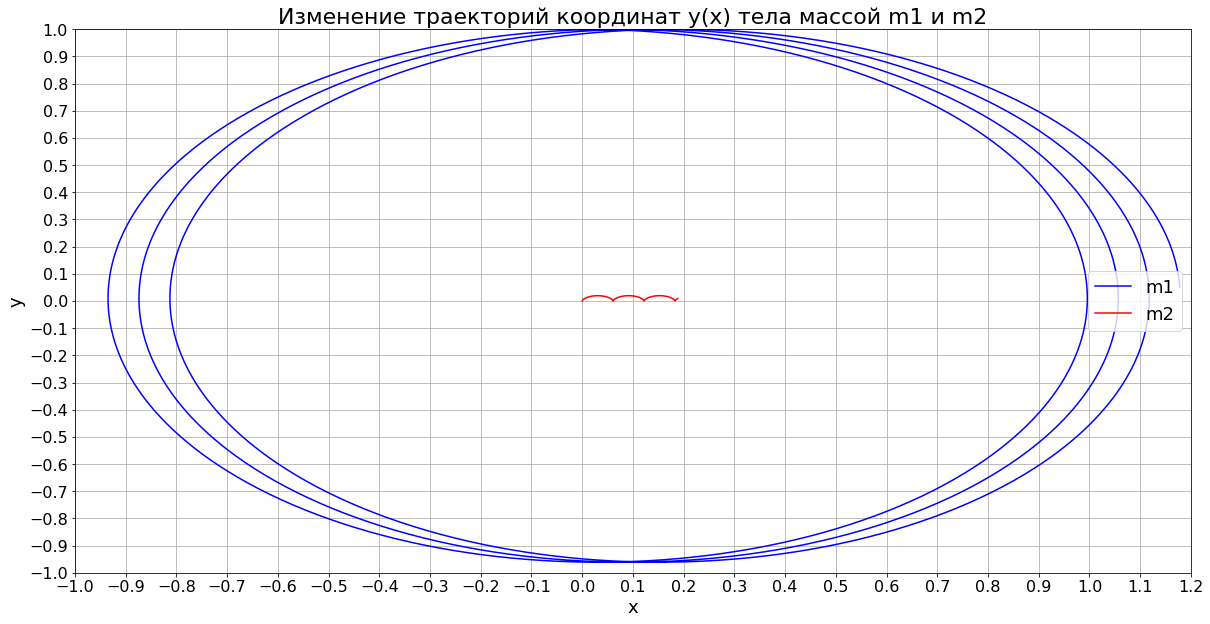

In [85]:
# Графики траекторий координат (x(t), z(t)) без трения
xlim_min = -1.0
xlim_max = 1.2
ylim_min = -1.0
ylim_max = 1.0
#t = range(points)
#t = [t[i]/(points-1) for i in range(len(t))]
#print(t)
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат y(x) тела массой m1 и m2', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(x1_3, y1_3, c = 'blue')
plt.plot(x2_3, y2_3, c = 'red')
plt.legend(['m1', 'm2'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 23), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 21), fontsize = 16);

###  $m_{1} = 1 $ , $ m_{2} = 1000 $ , шаг  $ \tau = 0.01 $ , время T = [0 ... 20]

In [87]:
m_1 = 1
m_2 = 1000
tau = 0.01
T = 20

(t_4, x1_4, y1_4, x2_4, y2_4, Vx1_4, Vy1_4, Vx2_4, Vy2_4) = PredictorCorrector_method(m_1, m_2, init_coord, init_velocity, tau, T)

In [88]:
min(x1_4), max(x1_4)

(-0.9933444424450183, 1.0121370088460213)

In [89]:
min(y1_4), max(y1_4)

(-0.9960822299011322, 1.0000002754658883)

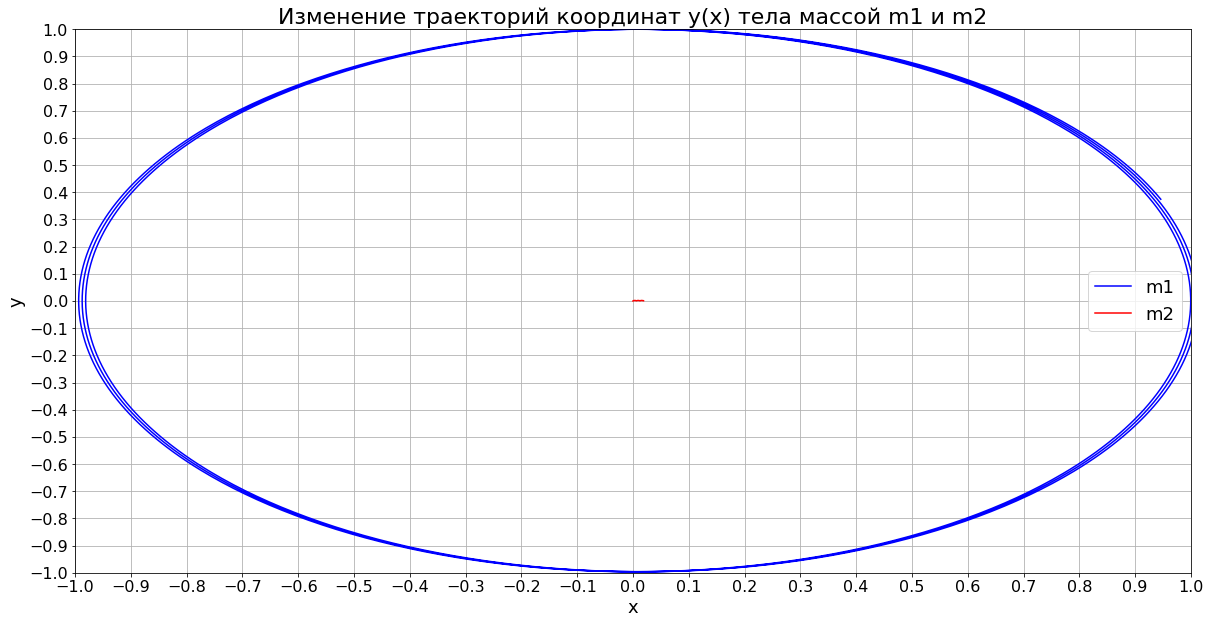

In [94]:
# Графики траекторий координат (x(t), z(t)) без трения
xlim_min = -1.0
xlim_max = 1.0
ylim_min = -1.0
ylim_max = 1.0
#t = range(points)
#t = [t[i]/(points-1) for i in range(len(t))]
#print(t)
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат y(x) тела массой m1 и m2', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(x1_4, y1_4, c = 'blue')
plt.plot(x2_4, y2_4, c = 'red')
plt.legend(['m1', 'm2'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 21), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 21), fontsize = 16);

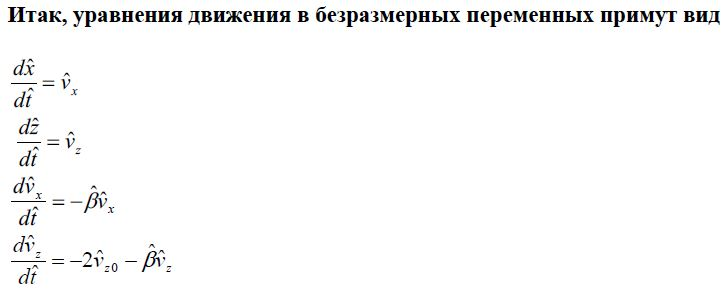

In [4]:
Image(filename='1_2part_equations.JPG', width=800, height=800)

In [5]:
# Функция чис
def analitical_trajectory (x_0, z_0, V0x, V0z, beta_0, m, t):
    g = 9.8      # ускорение свободного падения
    Vx_0 = 1
    Vz_0 = V0z / V0x
    beta = 2 * beta_0 * V0z / m * g
    if beta != 0:
        x = x_0 + Vx_0 / beta * (1 - math.exp(-beta * t))
        z = z_0 + Vz_0 / beta * (1 + 2 / beta) * (1 - math.exp(-beta * t)) - 2 * Vz_0 / beta * t
        Vx = Vx_0 * math.exp(-beta * t)
        Vz = Vz_0 * math.exp(-beta * t) * (1 + 2 / beta) - 2 * Vz_0 / beta
    elif beta == 0:
        x = x_0 + Vx_0 * t
        z = z_0 + Vz_0 * (t - math.pow(t, 2))
        Vx = Vx_0
        Vz = Vz_0 * (1 - 2 * t)
    return (x, z, Vx, Vz)        

In [6]:
# Отсутствует сила трения
x_0 = 0         # положение тела в момент времени t=0 по оси X
z_0 = 0         # положение тела в момент времени t=0 по оси Z
beta_0 = 0      # коэффициент трения
m = 1           # масса тела
points = 10001

V0x = 1         # проекция начальной скорости на ось X
V0z = 1         # проекция начальной скорости на ось Z

x_1 = np.zeros(points)
z_1 = np.zeros(points)
Vx_1 = np.zeros(points)
Vz_1 = np.zeros(points)

for t in range(points):
    (x_1[t], z_1[t], Vx_1[t], Vz_1[t]) = analitical_trajectory(x_0, z_0, V0x, V0z, beta_0, m, t/(points-1))

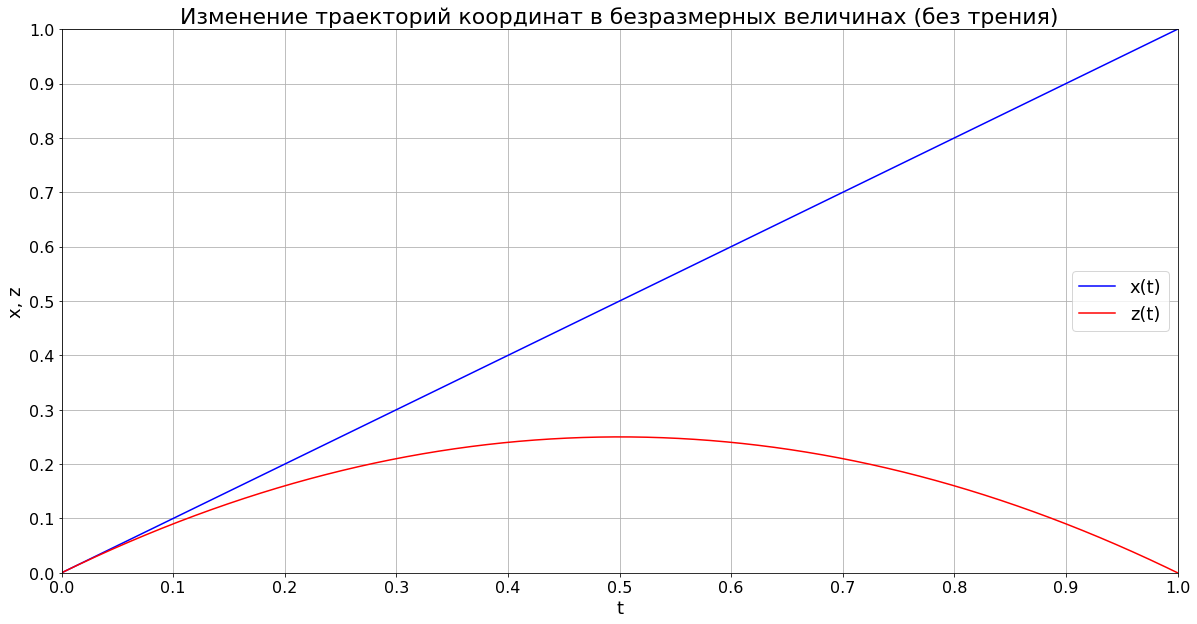

In [7]:
# Графики траекторий координат (x(t), z(t)) без трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 0.0
ylim_max = 1.0
t = range(points)
t = [t[i]/(points-1) for i in range(len(t))]
#print(t)
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат в безразмерных величинах (без трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('x, z', fontsize = 18)
plt.grid(True)
plt.plot(t, x_1, c = 'blue')
plt.plot(t, z_1, c = 'red')
plt.legend(['x(t)', 'z(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

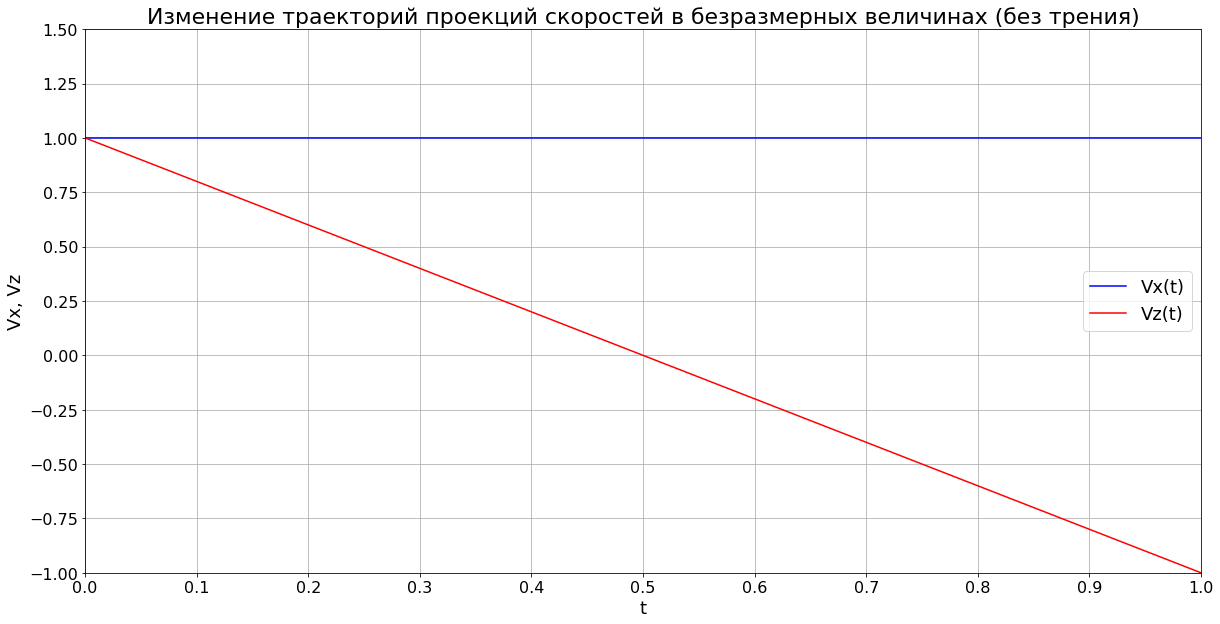

In [8]:
# Графики траекторий скоростей Vx(t), Vz(t)) без трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -1.0
ylim_max = 1.5
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий проекций скоростей в безразмерных величинах (без трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('Vx, Vz', fontsize = 18)
plt.grid(True)
plt.plot(t, Vx_1, c = 'blue')
plt.plot(t, Vz_1, c = 'red')
plt.legend(['Vx(t)', 'Vz(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

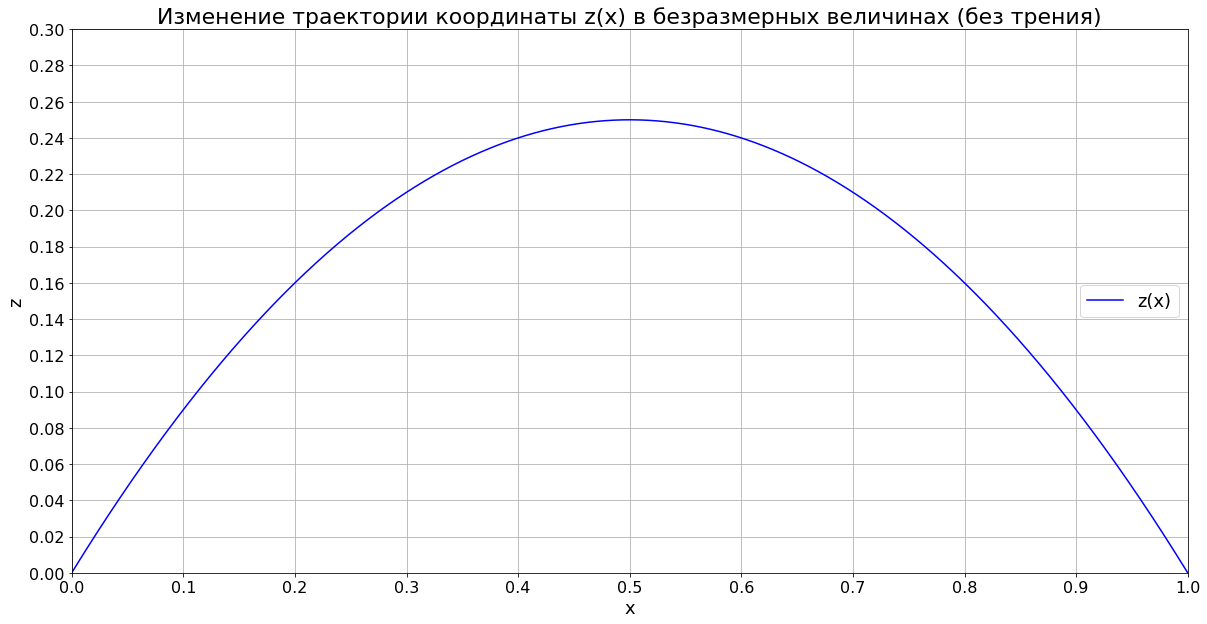

In [9]:
# График траектории координаты z(x) без трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 0.0
ylim_max = 0.3
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траектории координаты z(x) в безразмерных величинах (без трения)', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('z', fontsize = 18)
plt.grid(True)
plt.plot(x_1, z_1, c = 'blue')
plt.legend(['z(x)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 16), fontsize = 16);

In [10]:
# Присутсвует сила трения
x_0 = 0         # положение тела в момент времени t=0 по оси X
z_0 = 0         # положение тела в момент времени t=0 по оси Z
beta_0 = 0.1    # коэффициент трения
m = 1           # масса тела
points = 10001

V0x = 1         # проекция начальной скорости на ось X
V0z = 1         # проекция начальной скорости на ось Z

x_2 = np.zeros(points)
z_2 = np.zeros(points)
Vx_2 = np.zeros(points)
Vz_2 = np.zeros(points)

for t in range(points):
    (x_2[t], z_2[t], Vx_2[t], Vz_2[t]) = analitical_trajectory(x_0, z_0, V0x, V0z, beta_0, m, t/(points-1))

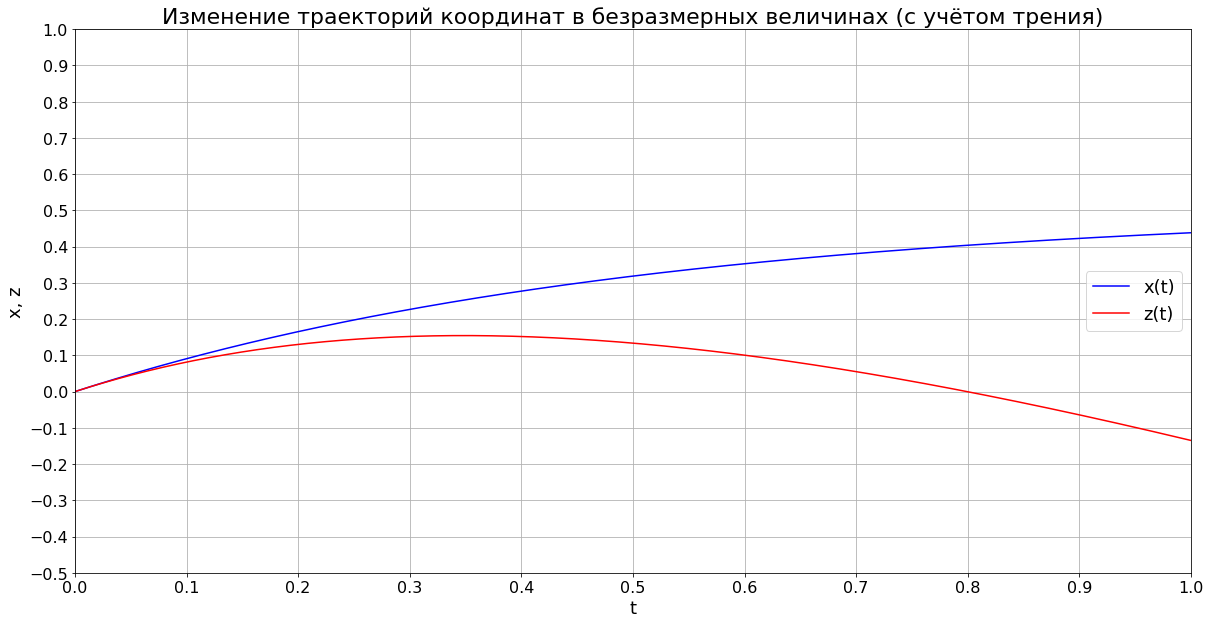

In [11]:
# Графики траекторий координат x(t), z(t) с учётом трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -0.5
ylim_max = 1.0
t = range(points)
t = [t[i]/(points-1) for i in range(len(t))]
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат в безразмерных величинах (с учётом трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('x, z', fontsize = 18)
plt.grid(True)
plt.plot(t, x_2, c = 'blue')
plt.plot(t, z_2, c = 'red')
plt.legend(['x(t)', 'z(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 16), fontsize = 16);

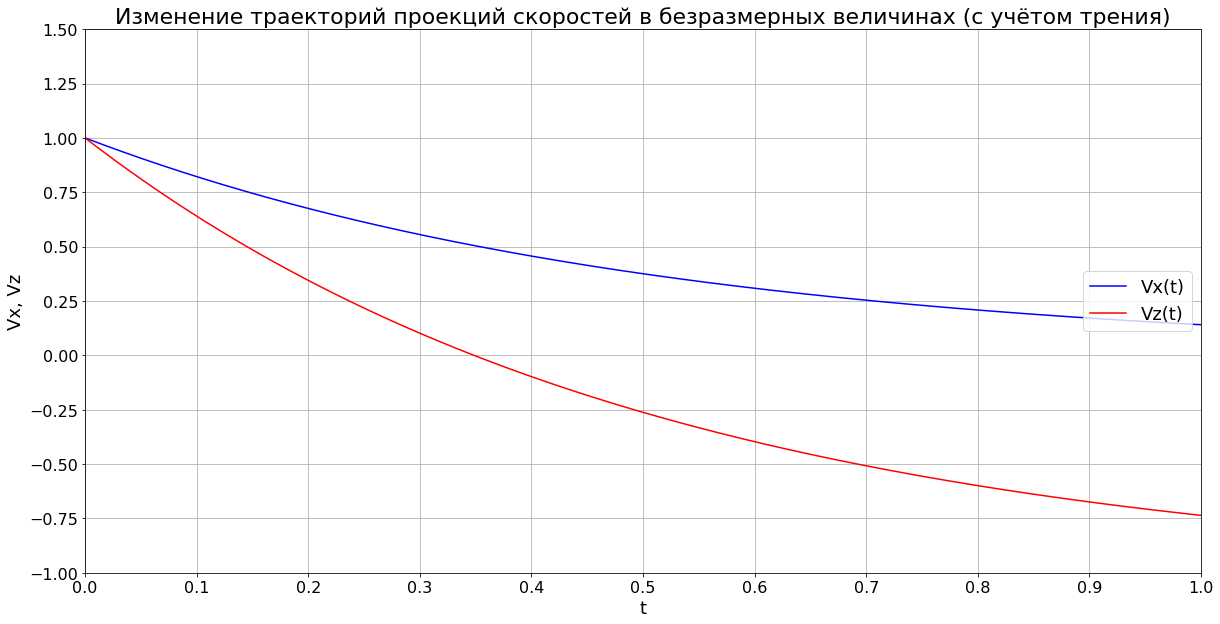

In [12]:
# Графики траекторий скоростей Vx(t), Vz(t) с учётом трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -1.0
ylim_max = 1.5
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий проекций скоростей в безразмерных величинах (с учётом трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('Vx, Vz', fontsize = 18)
plt.grid(True)
plt.plot(t, Vx_2, c = 'blue')
plt.plot(t, Vz_2, c = 'red')
plt.legend(['Vx(t)', 'Vz(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

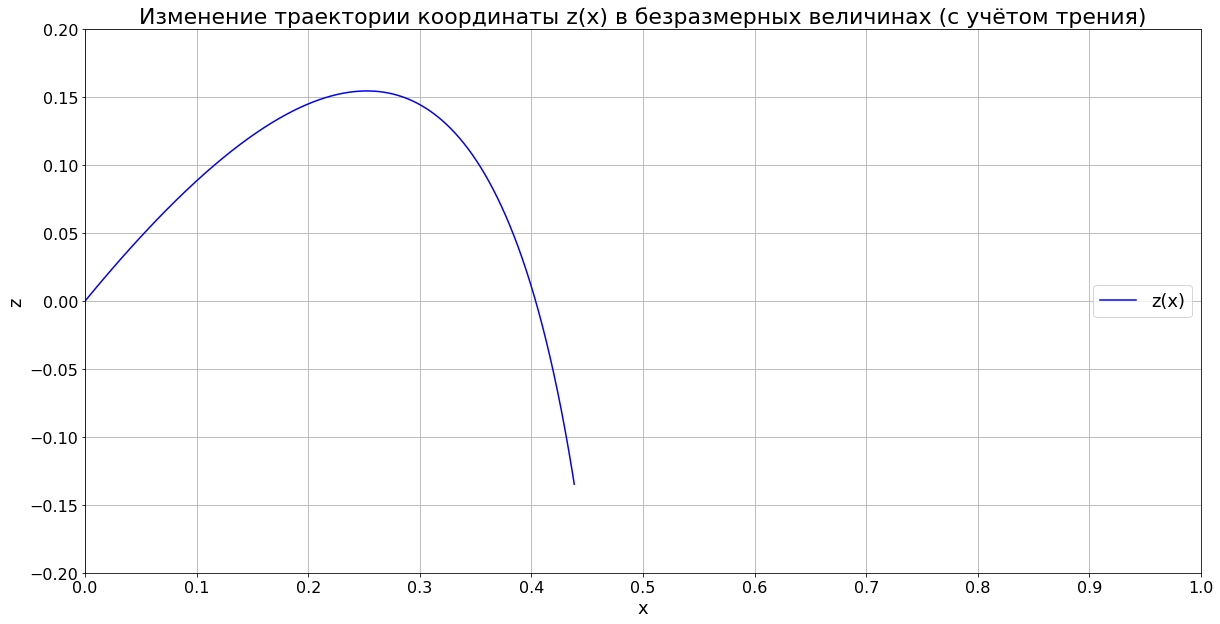

In [13]:
# График траектории координаты z(x) с учётом трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -0.2
ylim_max = 0.2
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траектории координаты z(x) в безразмерных величинах (с учётом трения)', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('z', fontsize = 18)
plt.grid(True)
plt.plot(x_2, z_2, c = 'blue')
plt.legend(['z(x)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 9), fontsize = 16);

### 2) Написать программу для решения уравнений движения частицы неявной схемой. Нарисовать графики аналитических траекторий Z(x) и X(t), Vx(t), Vz(t)

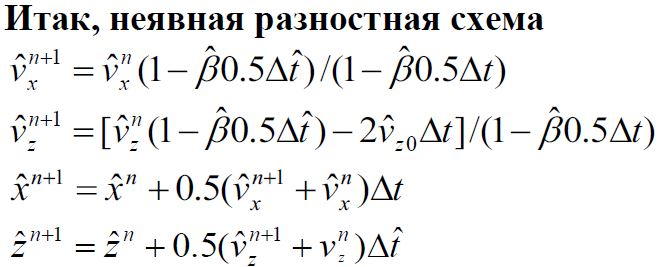

In [14]:
from IPython.display import Image
Image(filename='2part_equations.JPG', width=400, height=400)

In [15]:
# Неявная разностная схема для Vx
def implicitSchemaVx(Vx_0, tau, T, beta):
    n = int(round(T/tau))
    t = np.linspace(0, n * tau, n + 1)
    Vx = np.zeros(n + 1)
    Vx[0] = Vx_0
    for i in range(n):
        Vx[i + 1] = Vx[i] * (1 - beta * 0.5 * tau) / (1 + beta * 0.5 * tau)
    return Vx, t

In [16]:
# Неявная разностная схема для Vz
def implicitSchemaVz(Vz0, tau, T, beta):
    n = int(round(T/tau))
    t = np.linspace(0, n * tau, n + 1)
    Vz = np.zeros(n + 1)
    Vz[0] = Vz0
    for i in range(n):
        Vz[i + 1] = (Vz[i] * (1 - beta * 0.5 * tau) - 2 * Vz0 * tau) / (1 + beta * 0.5 * tau)
    return Vz, t

In [17]:
# Неявная разностная схема для координат
def implicitSchemaCoordinates(coord_0, V, tau, T):
    n = int(round(T/tau))
    t = np.linspace(0, n * tau, n + 1)
    coord = np.zeros(n + 1)
    coord[0] = coord_0
    for i in range(n):
        coord[i + 1] = coord[i] + 0.5 * (V[i + 1] + V[i]) * tau
    return coord, t

In [18]:
# Отсутствует сила трения
beta_0 = 0    # коэффициент трения
V0x = 1       # проекция начальной скорости на ось X
V0z = 1       # проекция начальной скорости на ось Z
m = 1         # масса тела

x_0 = 0       # положение тела в момент времени t=0 по оси X
z_0 = 0       # положение тела в момент времени t=0 по оси Z
Vx_0 = 1
g = 9.8
Vz_0 = V0z / V0x
beta = beta_0 * 2 * V0z / m * g

In [19]:
(Vx_3, t_2) = implicitSchemaVx(Vx_0, 0.0001, 1, beta)
(Vz_3, t_2) = implicitSchemaVz(Vz_0, 0.0001, 1, beta)
(x_3, t_2) = implicitSchemaCoordinates(x_0, Vx_3, 0.0001, 1)
(z_3, t_2) = implicitSchemaCoordinates(z_0, Vz_3, 0.0001, 1)

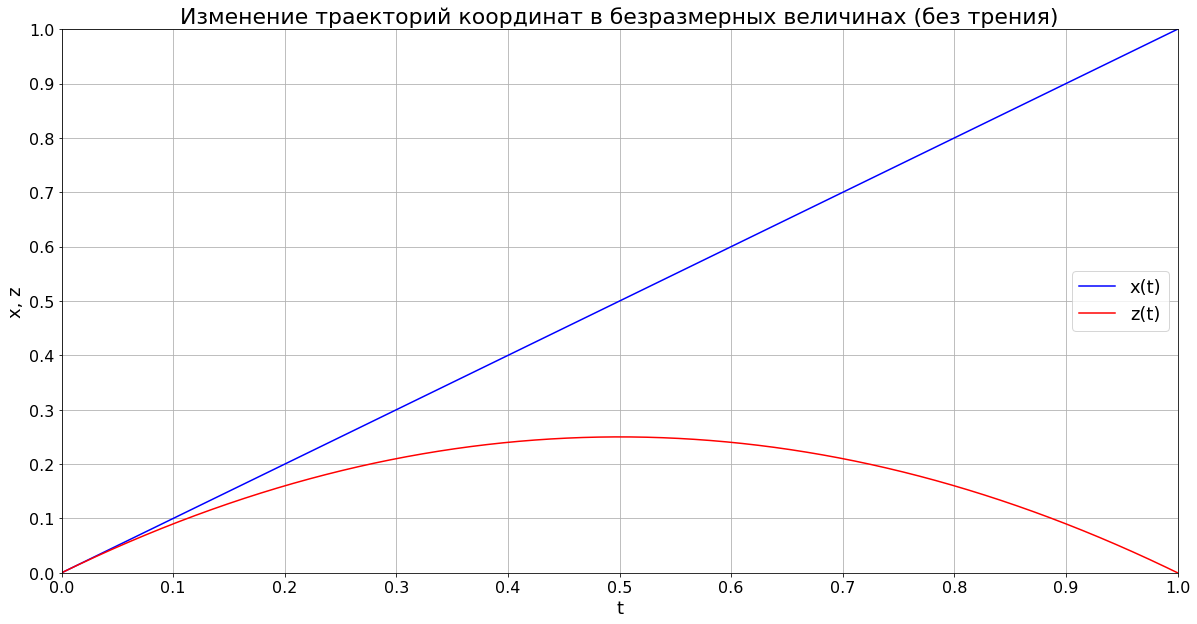

In [20]:
# Графики траекторий координат x(t), z(t) без трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 0.0
ylim_max = 1.0
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат в безразмерных величинах (без трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('x, z', fontsize = 18)
plt.grid(True)
plt.plot(t_2, x_3, c = 'blue')
plt.plot(t_2, z_3, c = 'red')
plt.legend(['x(t)', 'z(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

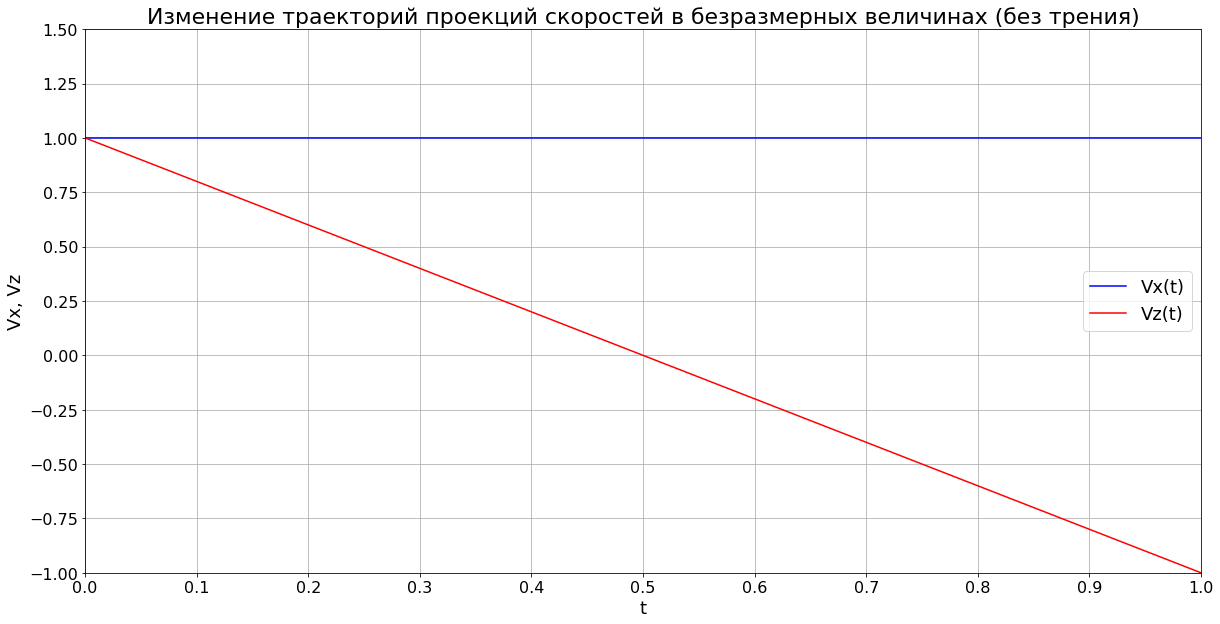

In [21]:
# Графики траекторий скоростей Vx(t), Vz(t)) без трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -1.0
ylim_max = 1.5
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий проекций скоростей в безразмерных величинах (без трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('Vx, Vz', fontsize = 18)
plt.grid(True)
plt.plot(t_2, Vx_3, c = 'blue')
plt.plot(t_2, Vz_3, c = 'red')
plt.legend(['Vx(t)', 'Vz(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

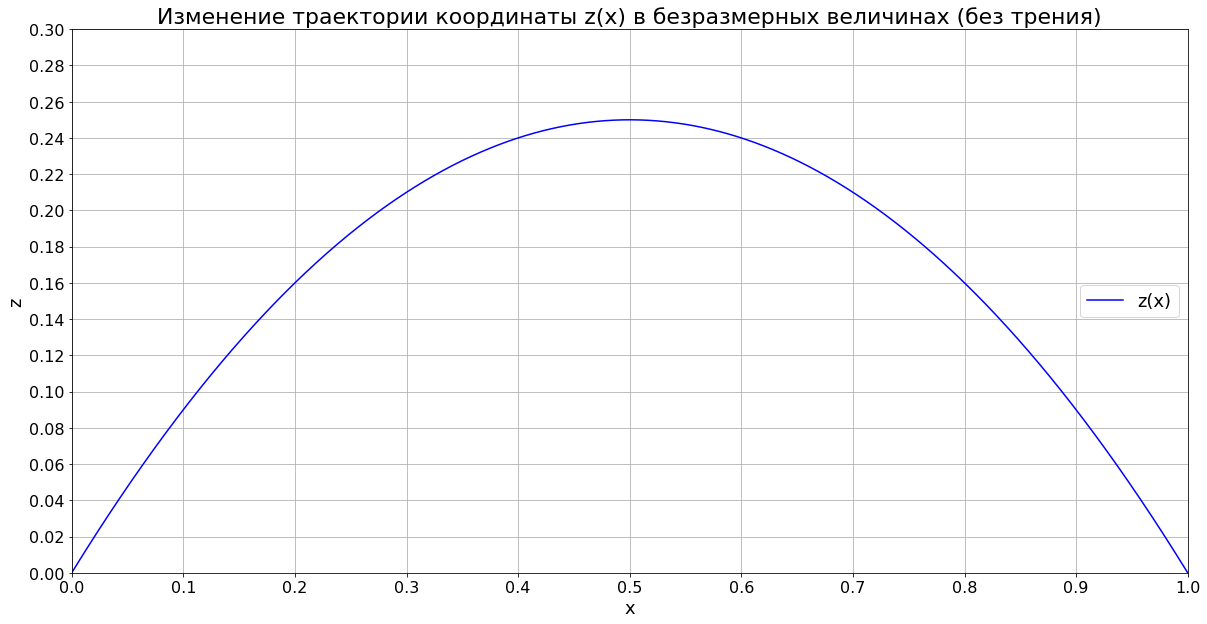

In [22]:
# График траектории координаты z(x) без трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 0.0
ylim_max = 0.3
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траектории координаты z(x) в безразмерных величинах (без трения)', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('z', fontsize = 18)
plt.grid(True)
plt.plot(x_3, z_3, c = 'blue')
plt.legend(['z(x)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 16), fontsize = 16);

In [23]:
# Присутствует сила трения
beta_0 = 0.1  # коэффициент трения
V0x = 1       # проекция начальной скорости на ось X
V0z = 1       # проекция начальной скорости на ось Z
m = 1         # масса тела

x_0 = 0       # положение тела в момент времени t=0 по оси X
z_0 = 0       # положение тела в момент времени t=0 по оси Z
Vx_0 = 1
g = 9.8
Vz_0 = V0z / V0x
beta = beta_0 * 2 * V0z / m * g

In [24]:
(Vx_4, t_2) = implicitSchemaVx(Vx_0, 0.0001, 1, beta)
(Vz_4, t_2) = implicitSchemaVz(Vz_0, 0.0001, 1, beta)
(x_4, t_2) = implicitSchemaCoordinates(x_0, Vx_4, 0.0001, 1)
(z_4, t_2) = implicitSchemaCoordinates(z_0, Vz_4, 0.0001, 1)

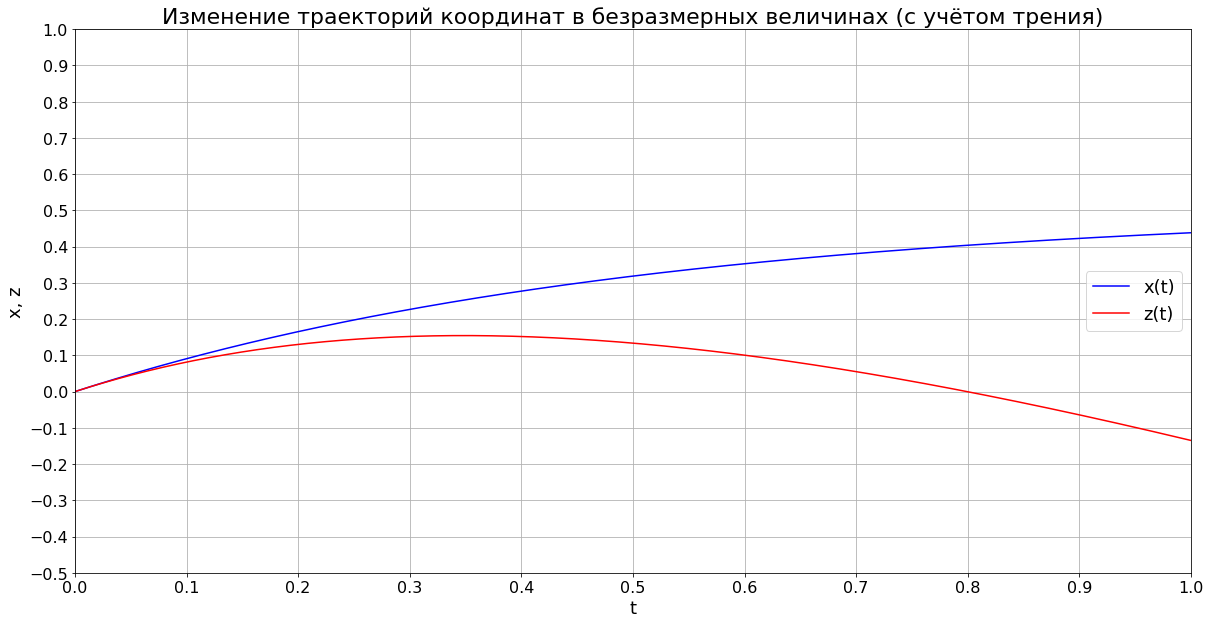

In [25]:
# Графики траекторий координат x(t), z(t) с учётом трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -0.5
ylim_max = 1.0
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат в безразмерных величинах (с учётом трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('x, z', fontsize = 18)
plt.grid(True)
plt.plot(t_2, x_4, c = 'blue')
plt.plot(t_2, z_4, c = 'red')
plt.legend(['x(t)', 'z(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 16), fontsize = 16);

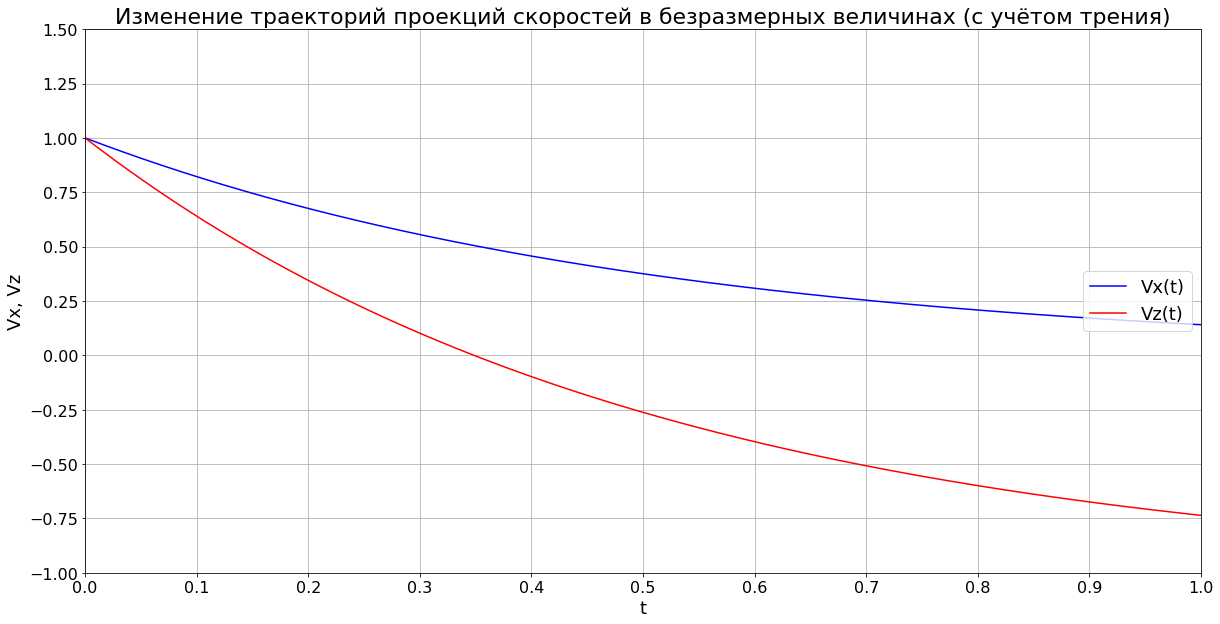

In [26]:
# Графики траекторий скоростей Vx(t), Vz(t)) с учётом трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -1.0
ylim_max = 1.5
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий проекций скоростей в безразмерных величинах (с учётом трения)', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('Vx, Vz', fontsize = 18)
plt.grid(True)
plt.plot(t_2, Vx_4, c = 'blue')
plt.plot(t_2, Vz_4, c = 'red')
plt.legend(['Vx(t)', 'Vz(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

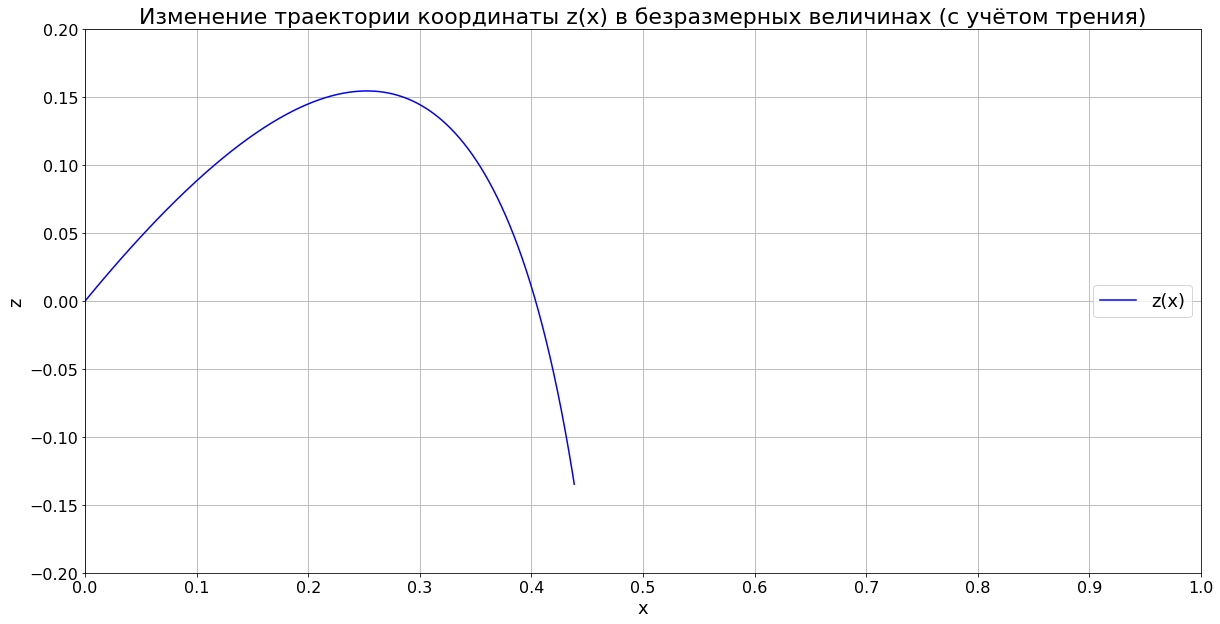

In [27]:
# График траектории координаты z(x) с учётом трения
xlim_min = 0.0
xlim_max = 1.0
ylim_min = -0.2
ylim_max = 0.2
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траектории координаты z(x) в безразмерных величинах (с учётом трения)', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('z', fontsize = 18)
plt.grid(True)
plt.plot(x_4, z_4, c = 'blue')
plt.legend(['z(x)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 9), fontsize = 16);

### 3) Вычислить и нарисовать графики $\delta x(t)$, $\delta z(t)$, $\delta V_x(t)$, $\delta V_z(t)$ точности численного решения от времени

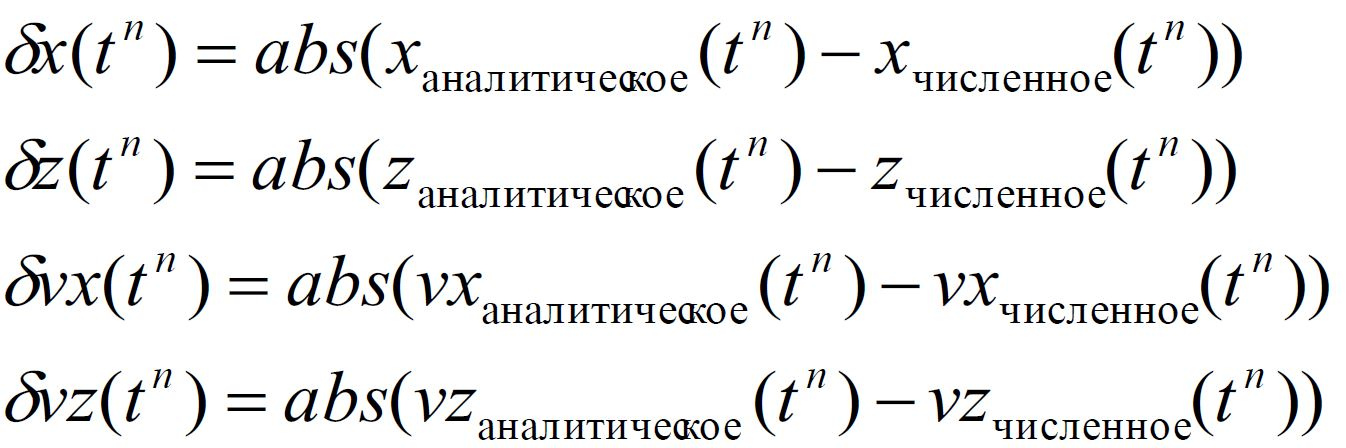

In [28]:
from IPython.display import Image
Image(filename='3part_equations.JPG', width=400, height=400)

In [29]:
deltaX = []
deltaZ = []
deltaVx = []
deltaVz = []
for t in range(points):
    deltaX.append((abs(x_2[t] - x_4[t])))
    deltaZ.append((abs(z_2[t] - z_4[t])))
    deltaVx.append((abs(Vx_2[t] - Vx_4[t])))
    deltaVz.append((abs(Vz_2[t] - Vz_4[t])))

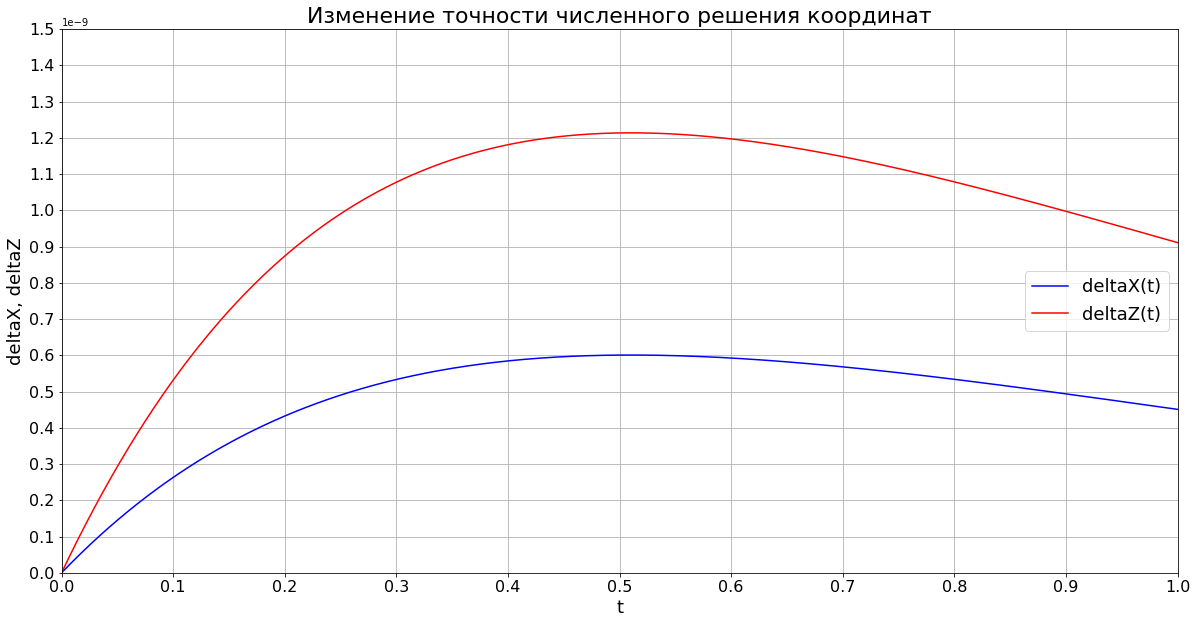

In [30]:
# Графики точности численного решения координат x(t), z(t)
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 0.0
ylim_max = 0.0000000015
t = range(points)
t = [t[i]/(points-1) for i in range(len(t))]
#print(x)
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение точности численного решения координат', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('deltaX, deltaZ', fontsize = 18)
plt.grid(True)
plt.plot(t, deltaX, c = 'blue')
plt.plot(t, deltaZ, c = 'red')
plt.legend(['deltaX(t)', 'deltaZ(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 16), fontsize = 16)
plt.ticklabel_format(axis='y', style='scientific');

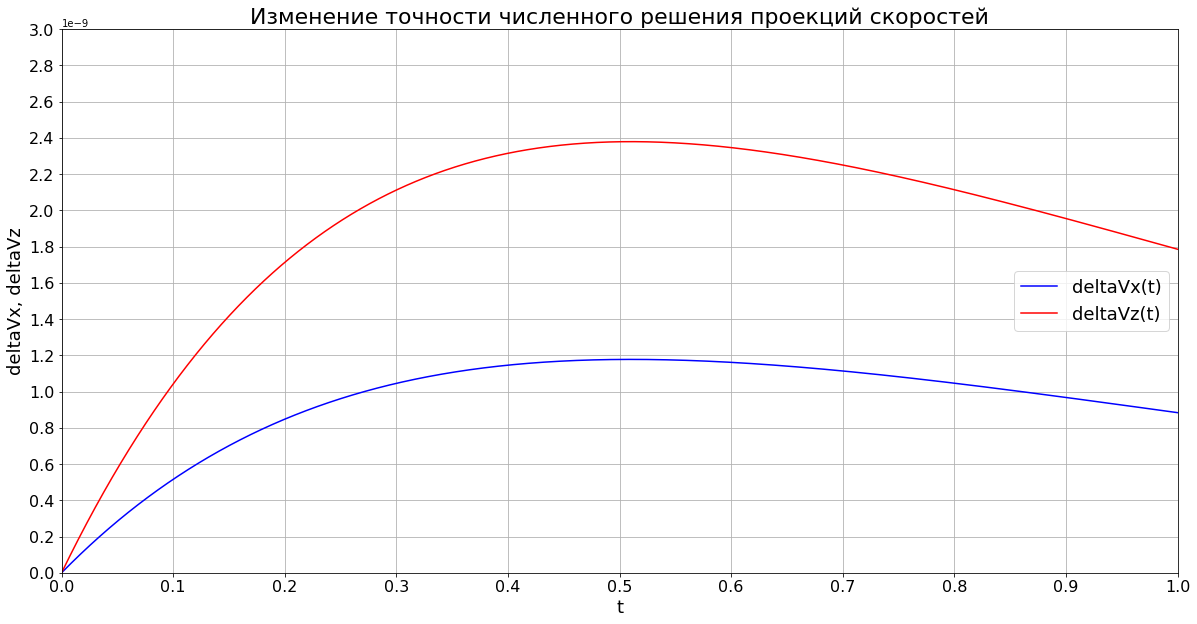

In [31]:
# График точности численного решения проекций скоростей Vx(t), Vz(t)
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 0.0
ylim_max = 0.000000003
t = range(points)
t = [t[i]/(points-1) for i in range(len(t))]
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение точности численного решения проекций скоростей', fontsize = 22)
plt.xlabel('t', fontsize = 18)
plt.ylabel('deltaVx, deltaVz', fontsize = 18)
plt.grid(True)
plt.plot(t, deltaVx, c = 'blue')
plt.plot(t, deltaVz, c = 'red')
plt.legend(['deltaVx(t)', 'deltaVz(t)'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 16), fontsize = 16)
plt.ticklabel_format(axis='y', style='scientific');